# Wolt segmentation project 

In [82]:
# First we import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [83]:
# Importing the data using pandas
data = pd.read_csv('dataset_for_analyst_assignment_20201120.csv')

# Making a copy of the data so that we keep the original data safe
wolt_data = data.copy()

# Checking the first 5 rows of the data
wolt_data.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [84]:
# Checking the columns of the data
wolt_data.columns

Index(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT',
       'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY',
       'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'USER_ID',
       'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
       'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
       'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'PREFERRED_RESTAURANT_TYPES', 'USER_HAS_VALID_PAYMENT_METHOD',
       'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
       'PURCHASE_COUNT_BY_STORE_TYPE'],
      dtype='object')

In [85]:
# Checking the info of the dataframe, this will allow us to see the shape, column names, type and memory usage
wolt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

#### We notice that the dataframe date column is not a datetime type and the user_id is an integer so we will start first by changing the type of these columns so that it represents the data correctly

In [86]:
wolt_data['REGISTRATION_DATE'] = pd.to_datetime(wolt_data['REGISTRATION_DATE'])
wolt_data['USER_ID'] = wolt_data['USER_ID'].astype(str)

In [87]:
wolt_data.dtypes

REGISTRATION_DATE                          datetime64[ns]
REGISTRATION_COUNTRY                               object
PURCHASE_COUNT                                      int64
PURCHASE_COUNT_DELIVERY                           float64
PURCHASE_COUNT_TAKEAWAY                           float64
FIRST_PURCHASE_DAY                                 object
LAST_PURCHASE_DAY                                  object
USER_ID                                            object
BREAKFAST_PURCHASES                               float64
LUNCH_PURCHASES                                   float64
EVENING_PURCHASES                                 float64
DINNER_PURCHASES                                  float64
LATE_NIGHT_PURCHASES                              float64
TOTAL_PURCHASES_EUR                               float64
DISTINCT_PURCHASE_VENUE_COUNT                     float64
MIN_PURCHASE_VALUE_EUR                            float64
MAX_PURCHASE_VALUE_EUR                            float64
AVG_PURCHASE_V

In [88]:
# Checking for null values and whether this would impact our analysis negatively or not  
wolt_data.isnull().sum()

REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
USER_ID                                        0
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                               9955
WEB_PURCHASES       

In [89]:
# Checking the value counts of the REGISTRATION COUNTRY to get a quick image of which country has the most customers
wolt_data['REGISTRATION_COUNTRY'].value_counts()

FIN    10277
DNK     8081
GRC     3042
USA       70
GBR       54
SWE       45
EST       44
DEU       39
NOR       34
ITA       24
POL       23
LTU       22
ESP       19
CZE       14
HUN       11
FRA       11
AUS       11
BEL       11
NLD       10
ISR        9
RUS        8
CYP        7
IND        7
BRA        7
LVA        7
IRL        7
CAN        6
JPN        6
ARE        6
QAT        6
AUT        5
PRT        5
HRV        5
ROU        5
CHE        4
SGP        4
FRO        3
SVK        3
CHN        3
TUR        2
COL        2
JOR        2
LBN        2
CHL        2
ISL        2
UKR        2
AZE        2
KOR        1
TWN        1
KWT        1
SVN        1
PAK        1
GIN        1
PHL        1
MLT        1
MEX        1
GEO        1
SAU        1
HKG        1
Name: REGISTRATION_COUNTRY, dtype: int64

In [90]:
# I realised that the PURCHASE COUNT_BY_STORE_TYPE has very valuable information to visualise
wolt_data['PURCHASE_COUNT_BY_STORE_TYPE'].head()

0    {\n  "General merchandise": 0,\n  "Grocery": 0...
1    {\n  "General merchandise": 0,\n  "Grocery": 0...
2    {\n  "General merchandise": 1,\n  "Grocery": 9...
3    {\n  "General merchandise": 0,\n  "Grocery": 0...
4    {\n  "General merchandise": 0,\n  "Grocery": 0...
Name: PURCHASE_COUNT_BY_STORE_TYPE, dtype: object

#### Breaking down the column PURCHASE_COUNT_BY_STORE TYPE into multiple columns to get better insights of the store type of the purchased products

In [91]:
# Setting up empty lists to store the values of the PURCHASE_COUNT_BY_STORE
General_merchandise = []
Grocery = []
Pet_supplies = []
Restaurant = []
Retail_store = []


# Looping over the PURCHASE_COUNT_BY_STORE_TYPE column to extract the information and store them in new columns
for row in wolt_data['PURCHASE_COUNT_BY_STORE_TYPE']:
    
    # The reason why I choose 2 digits when slicing, is because sum values have more than one digit
    General_merchandise.append(row[27:29]) # This will get the General merchandise values
    Grocery.append(row[43:45]) # This will get the Grocery values
    Pet_supplies.append(row[64:66]) # This will get the Pet supplies values
    Restaurant.append(row[83:85]) # This will get the Restaurant values
    Retail_store.append(row[104:106]) # This will get the Retail store values

In [92]:
# Creating new columns to store the values of each store
wolt_data['General_merchandise'] = General_merchandise
wolt_data['Grocery'] = Grocery
wolt_data['Pet_supplies'] = Pet_supplies
wolt_data['Restaurant'] = Restaurant
wolt_data['Retail_store'] = Retail_store

In [93]:
# Checking the new dataframe
wolt_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REGISTRATION_DATE                        21983 non-null  datetime64[ns]
 1   REGISTRATION_COUNTRY                     21983 non-null  object        
 2   PURCHASE_COUNT                           21983 non-null  int64         
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64       
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64       
 5   FIRST_PURCHASE_DAY                       11964 non-null  object        
 6   LAST_PURCHASE_DAY                        12027 non-null  object        
 7   USER_ID                                  21983 non-null  object        
 8   BREAKFAST_PURCHASES                      12028 non-null  float64       
 9   LUNCH_PURCHASES                        

In [94]:
# Cheking the 5 new columns
wolt_data.iloc[:, -5:].columns

Index(['General_merchandise', 'Grocery', 'Pet_supplies', 'Restaurant',
       'Retail_store'],
      dtype='object')

In [95]:
# the Pet_supplies, Restaurant, Retail_store have the value : between them and that needs to be replaced 
# That was caused while breaking down the PURCHASE_COUNT_BY_STORE_TYPE column into multiple columns 
# We can easily extract only the numeric values and remove the :
wolt_data['Pet_supplies'].value_counts()

0,    21599
 0      209
 1      173
:         2
Name: Pet_supplies, dtype: int64

In [96]:
# the Retail_store have the value e' and : between them and that need to be replaced 

wolt_data['Retail_store'].value_counts()

0\n    19742
3\n      474
:        383
 1       345
4\n      309
5\n      205
6\n      141
7\n      117
8\n       87
9\n       80
 2        60
 3        22
 4         8
 5         4
 6         2
e"         2
 8         1
 7         1
Name: Retail_store, dtype: int64

In [97]:
# Making a copy of the data
wolt_data_new = wolt_data.copy()

In [98]:
# Replacing the : value to 0
wolt_data_new['Pet_supplies'] = wolt_data_new['Pet_supplies'].replace(to_replace =": ",
                 value ="0")

# Replacing the : value to 0
wolt_data_new['Restaurant'] = wolt_data_new['Restaurant'].replace(to_replace =": ",
                 value ="0")

# Replacing the e" value to 0
wolt_data_new['Retail_store'] = wolt_data_new['Retail_store'].replace(to_replace ='e"',
                 value ="0")

# Replacing the : value to 0
wolt_data_new['Retail_store'] = wolt_data_new['Retail_store'].replace(to_replace =': ',
                 value ="0")

In [99]:
# Showing the new value
wolt_data_new['Pet_supplies'].value_counts()

0,    21599
 0      209
 1      173
0         2
Name: Pet_supplies, dtype: int64

In [100]:
# Extracting only the numeric values
wolt_data_new['General_merchandise'] = wolt_data_new['General_merchandise'].str.extract('(\d+)').astype(int)
wolt_data_new['Grocery'] = wolt_data_new['Grocery'].str.extract('(\d+)').astype(int)
wolt_data_new['Pet_supplies'] = wolt_data_new['Pet_supplies'].str.extract('(\d+)').astype(int)
wolt_data_new['Restaurant'] = wolt_data_new['Restaurant'].str.extract('(\d+)').astype(int)
wolt_data_new['Retail_store'] = wolt_data_new['Retail_store'].str.extract('(\d+)').astype(int)


In [101]:
#Checking the new outcome
wolt_data_new['Pet_supplies'].value_counts()

0    21810
1      173
Name: Pet_supplies, dtype: int64

In [102]:
#Checking the new outcome
wolt_data_new['Retail_store'].value_counts()

0    20127
3      496
1      345
4      317
5      209
6      143
7      118
8       88
9       80
2       60
Name: Retail_store, dtype: int64

In [103]:
# Converting the type of the new columns into integers 
wolt_data_new['General_merchandise'] = wolt_data_new['General_merchandise'].astype(int)
wolt_data_new['Grocery'] = wolt_data_new['Grocery'].astype(int)
wolt_data_new['Pet_supplies'] = wolt_data_new['Pet_supplies'].astype(int)
wolt_data_new['Restaurant'] = wolt_data_new['Restaurant'].astype(int)
wolt_data_new['Retail_store'] = wolt_data_new['Retail_store'].astype(int)

In [104]:
# Checking the type of the new columns
wolt_data_new.iloc[:, -5:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   General_merchandise  21983 non-null  int32
 1   Grocery              21983 non-null  int32
 2   Pet_supplies         21983 non-null  int32
 3   Restaurant           21983 non-null  int32
 4   Retail_store         21983 non-null  int32
dtypes: int32(5)
memory usage: 429.5 KB


In [105]:
# Running descriptive statistics to take a deeper look at the data and understand it
descriptive_statistics = wolt_data_new.describe()
descriptive_statistics

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,...,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General_merchandise,Grocery,Pet_supplies,Restaurant,Retail_store
count,21983.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.0,12028.000000,12028.000000,...,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000
mean,3.345358,5.741686,0.372464,0.193964,2.375042,0.493432,3.029016,0.0,176.210419,3.319671,...,11.501995,4.010392,64.293539,55.792135,5.961218,0.065596,0.569349,0.007870,1.746486,0.335441
std,8.523171,10.536220,1.416310,1.104067,5.626178,1.827710,5.238209,0.0,299.086986,3.766418,...,6.930837,2.010071,72.570103,74.963336,3.466263,0.247580,2.785153,0.088364,3.213905,1.278207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,1.000000,...,5.000000,2.000000,18.000000,10.000000,2.950500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,2.000000,...,11.500000,4.000000,39.500000,25.000000,5.928000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,6.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,4.000000,...,18.000000,6.000000,81.000000,68.250000,8.978000,0.000000,0.000000,0.000000,3.000000,0.000000
max,320.000000,320.000000,44.000000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,71.000000,...,23.000000,7.000000,421.000000,421.000000,11.999000,1.000000,82.000000,1.000000,88.000000,9.000000


In [106]:
# Filling the null values with the string Unknown
wolt_data_new["PREFERRED_DEVICE"].fillna('Unkown', inplace=True)


Text(0.5, 1.0, 'Purchase count per device type for each registration data')

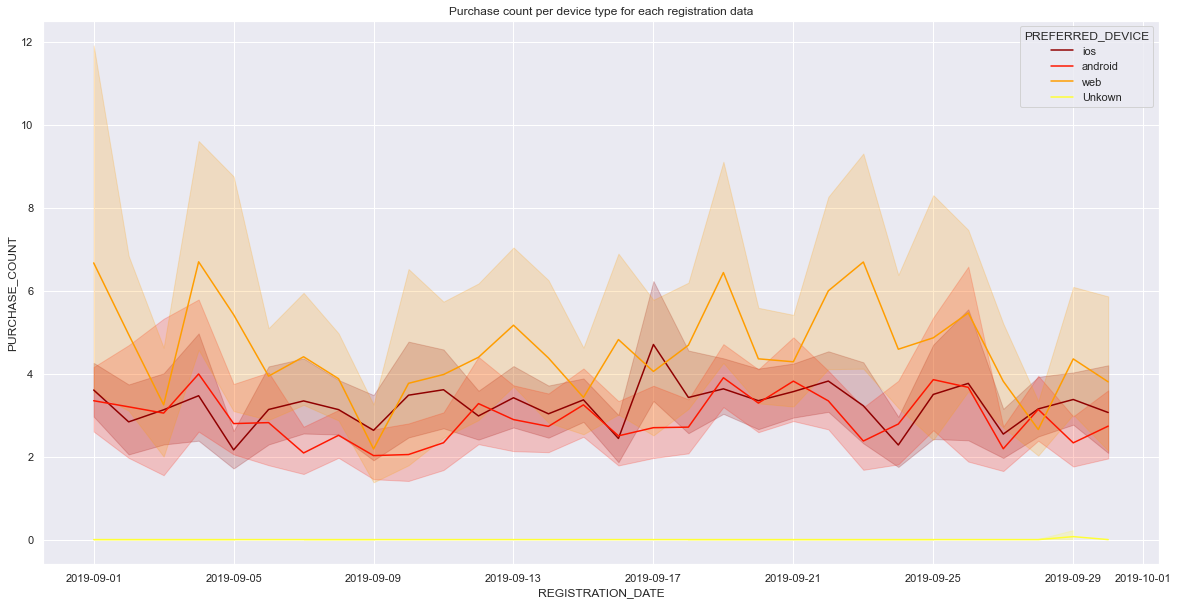

In [107]:
# Setting the size of the figure
sns.set(rc = {'figure.figsize':(20,10)})

# Draw line plot of REGISTRATION_DATE and PURCHASE_COUNT with parameters
line_chart = sns.lineplot(data = wolt_data_new, x ='REGISTRATION_DATE', y='PURCHASE_COUNT', hue='PREFERRED_DEVICE',
            style = "PREFERRED_DEVICE", palette = "hot", dashes = False,  legend="brief")
line_chart.set_title("Purchase count per device type for each registration data")

#### Looking at the line chart we notice that customers purchase the most using the web platform, followed by IOS and Android that are almost equally popular modes of purchase

In [108]:
sns.set(rc = {'figure.figsize':(20,10)})

# Creating a sub dataframe to segment the data based on the time of purchase
df_multible_columns = pd.DataFrame(data = wolt_data_new, columns = ['BREAKFAST_PURCHASES','LUNCH_PURCHASES',
                                                                'EVENING_PURCHASES','DINNER_PURCHASES',
                                                               'LATE_NIGHT_PURCHASES'])
# Melting the dataframe to become long instead of wide for better visualisation
df_multible_columns_long = pd.melt(df_multible_columns)

df_multible_columns_long.head()

# Grouping by the purchase time and summing the values
df_multible_columns_long = df_multible_columns_long.groupby('variable', as_index = False).sum()

Text(0.5, 1.0, 'Purchase count per meal time')

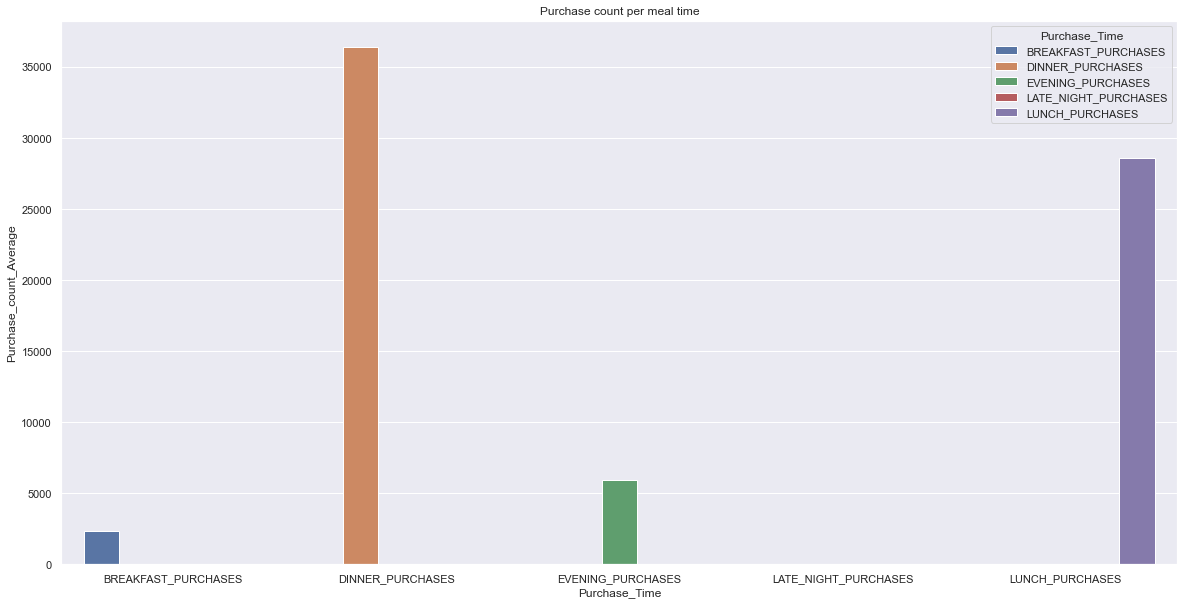

In [109]:
# Renaming the columns
df_multible_columns_long.rename({'variable': 'Purchase_Time', 'value': 'Purchase_count_Average'}, axis = 1, inplace=True)

# Creating a bar chart that shows the average of purchase count for each category
meal_time = sns.barplot(x="Purchase_Time", y="Purchase_count_Average", hue = 'Purchase_Time', data= df_multible_columns_long)

meal_time.set_title('Purchase count per meal time')


#### It is clear from the chart that most users purchase at dinner and lunch time, which opens possibilities to provide products that would sell for breakfast and other times. However it also tells us that most of our sales come from dinner and lunch so we can optimise our app to make good deals during those times

In [110]:
# Setting up the figure size
sns.set(rc = {'figure.figsize':(20,10)})

# Creating a sub dataframe to segment the data based on the type of purchase
df_purchase_type = pd.DataFrame(data = wolt_data_new, columns = ['General_merchandise', 'Grocery',
       'Pet_supplies', 'Restaurant', 'Retail_store'])

# Melting the dataframe to become long instead of wide for better visualisation
df_purchase_type_long = pd.melt(df_purchase_type)

df_purchase_type_long.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109915 entries, 0 to 109914
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   variable  109915 non-null  object
 1   value     109915 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 1.3+ MB


In [111]:
# Cheking if we have any missing values
df_purchase_type_long.isnull().sum()

variable    0
value       0
dtype: int64

In [112]:
# Checking the new dataframe
df_purchase_type_long

,variable,value
0,General_merchandise,0
1,General_merchandise,0
2,General_merchandise,1
3,General_merchandise,0
4,General_merchandise,0
...,...,...
109910,Retail_store,0
109911,Retail_store,0
109912,Retail_store,0
109913,Retail_store,0


In [113]:
# Renaming the columns
df_purchase_type_long.rename({'variable': 'Purchase_Type', 'value': 'Quantity_of_purchases'}, axis = 1, inplace=True)


In [114]:
# Grouping and summing the values to visualise the data
df_purchase_type_long = df_purchase_type_long.groupby(['Purchase_Type'], as_index = False).sum()

Text(0.5, 1.0, 'Purchase quantity per store type')

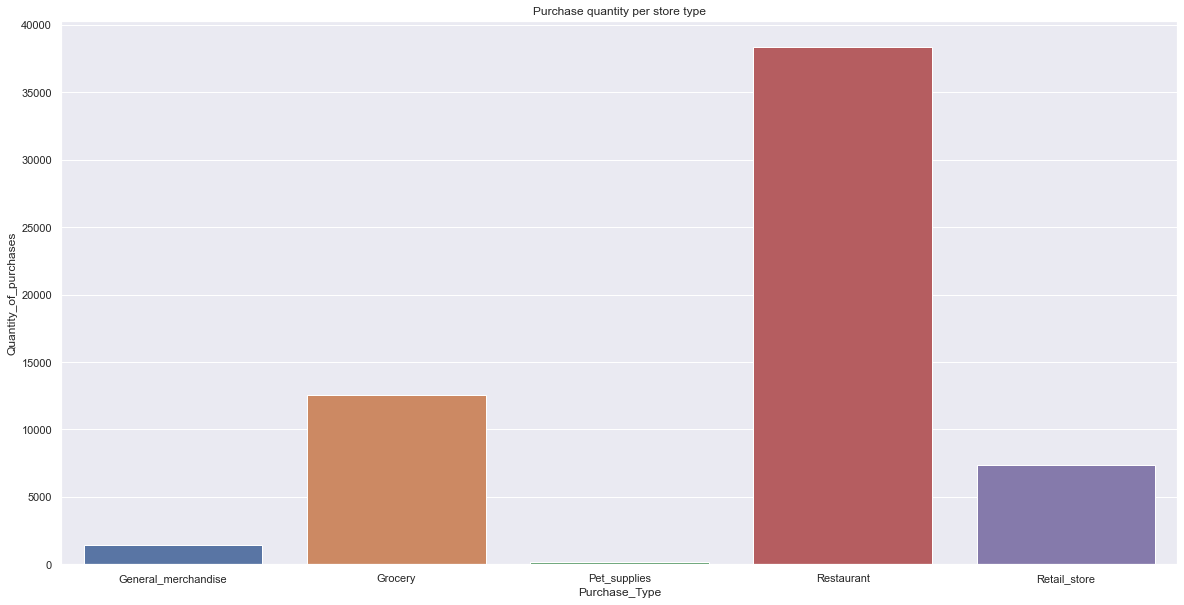

In [115]:

# Creating a bar chart that shows the sum of purchase store type for each category
store_type = sns.barplot(x="Purchase_Type", y = 'Quantity_of_purchases', data= df_purchase_type_long)

store_type.set_title('Purchase quantity per store type')

#### We can see on the chart that most of the orders come from restaurants and groceries then come at second place. That could be caused by not having enough options for the other stores types.

#### That means we could increase the variety of general merchandise, pet supply and retail store products available for purchase.

In [116]:
wolt_data_new.columns

Index(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT',
       'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY',
       'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'USER_ID',
       'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
       'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
       'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'PREFERRED_RESTAURANT_TYPES', 'USER_HAS_VALID_PAYMENT_METHOD',
       'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
       'PURCHASE_COUNT_BY_STORE_TYPE', 'General_merchandise', 'Grocery',
       'Pet_supplies', 'Restaurant', 'Retail_store'],
      dtype='object')

In [123]:
top_20_users = wolt_data_new.sort_values('PURCHASE_COUNT', ascending=False).head(20)

Text(0.5, 1.0, 'Top 20 users per purchase count and country')

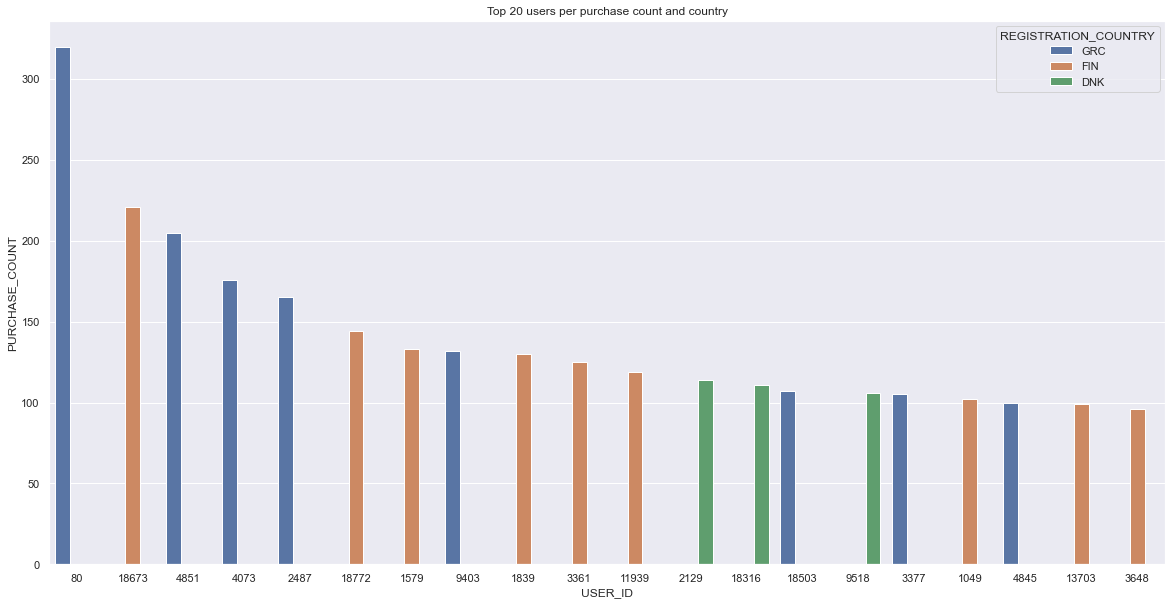

In [128]:

# Creating a bar chart that shows Top 20 users per purchase count and country
store_type = sns.barplot(x="USER_ID", y = 'PURCHASE_COUNT', data= top_20_users, hue = 'REGISTRATION_COUNTRY')

store_type.set_title('Top 20 users per purchase count and country')

#### In the chart above we can have a quick view of all users by country and see the most loyal customers, perhaps we can offer them special points and offers so that we can make sure they have a good experience with us and increase our chances for not losing them.



In [38]:
# Creating a segement of the dataframe that will show users with 0 purchases 
zero_purchase = wolt_data_new[wolt_data_new['PURCHASE_COUNT'] == 0]

# Grouping by PREFERRED_DEVICE and counting the values
PREFERRED_DEVICE = zero_purchase.groupby(['PREFERRED_DEVICE'], as_index = False)['REGISTRATION_DATE'].count()
PREFERRED_DEVICE

,PREFERRED_DEVICE,REGISTRATION_DATE
0,Unkown,72
1,android,4340
2,ios,4419
3,web,1124


In [39]:
# Calculating the percentage to see the ratio of customers with 0 purchases per device type

PREFERRED_DEVICE['percent'] = (PREFERRED_DEVICE['REGISTRATION_DATE'] / PREFERRED_DEVICE['REGISTRATION_DATE'].sum()) * 100
PREFERRED_DEVICE

,PREFERRED_DEVICE,REGISTRATION_DATE,percent
0,Unkown,72,0.723255
1,android,4340,43.596183
2,ios,4419,44.389754
3,web,1124,11.290809


Text(0.5, 1.0, 'The count of users who registered but never ordered anything')

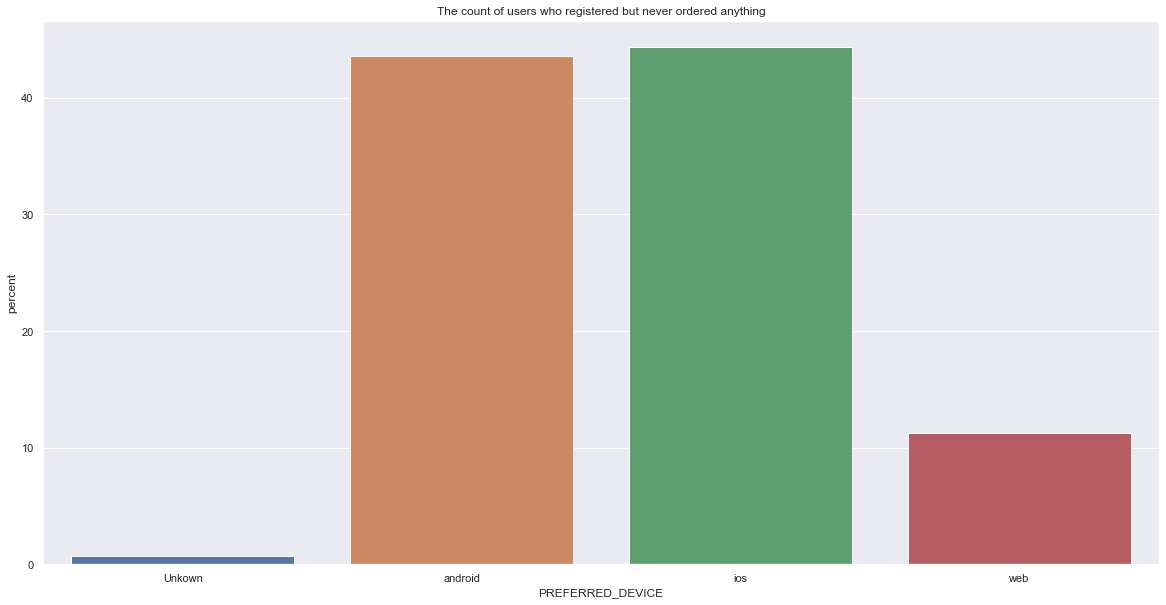

In [131]:
# Creating a bar chart that shows users who registered but never ordered anything
store_type = sns.barplot(x="PREFERRED_DEVICE", y = 'percent', data= PREFERRED_DEVICE)

store_type.set_title('The count of users who registered but never ordered anything')

#### This is fascinating to see, users who use the web in the previous chart have the most purchases but in this chart, we see the opposite. Users with Android and IOS who didn't purchase anything when combined will have the 87% and for the web, we have 11%.

#### This is a great opportunity to dig deeper and understand what could be the reason behind this. Is it that the Android and IOS app doesn't provide a great experience or does the app keep crushing in their phones? Can we encourage users to use the web as that might make it easier for them to purchase? Should we send them exclusive offers through emails and texts? There are many possible solutions to reactivate these users that we can draw from these charts.

In [41]:
# Renaming the values to weekday for easier read, starting from 1 Monday
wolt_data_new['MOST_COMMON_WEEKDAY_TO_PURCHASE'] = wolt_data_new['MOST_COMMON_WEEKDAY_TO_PURCHASE'].replace({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                                          4: 'Thursday', 5: 'Friday', 6: 'Saturday',
                                                         7: 'Sunday'})


In [42]:
# There are no significant differences in the purchase count per weekday
wolt_data_new.groupby(['MOST_COMMON_WEEKDAY_TO_PURCHASE'])['PURCHASE_COUNT'].sum()

MOST_COMMON_WEEKDAY_TO_PURCHASE
Friday        9694
Monday       10259
Saturday     10066
Sunday       10758
Thursday     11518
Tuseday      10737
Wednesday    10509
Name: PURCHASE_COUNT, dtype: int64

#### There are no significant differences in purchases per weekday but the lowest is Friday and highest is Thursday

In [43]:
# Creating true or false values based on whether there is a purchase at a certain store or not

wolt_data_new['General_merchandise_yes_or_no'] = wolt_data_new['General_merchandise'] > 0
wolt_data_new['Grocery_yes_or_no'] = wolt_data_new['Grocery'] > 0
wolt_data_new['Pet_supplies_yes_or_no'] = wolt_data_new['Pet_supplies'] > 0
wolt_data_new['Restaurant_yes_or_no'] = wolt_data_new['Restaurant'] > 0
wolt_data_new['Retail_store_yes_or_no'] = wolt_data_new['Retail_store'] > 0


In [44]:
# Changing the true and false values into 0 and 1 so that we can easily sum them
wolt_data_new['General_merchandise_yes_or_no'] = wolt_data_new['General_merchandise_yes_or_no'].astype(int)
wolt_data_new['Grocery_yes_or_no'] = wolt_data_new['Grocery_yes_or_no'].astype(int)
wolt_data_new['Pet_supplies_yes_or_no'] = wolt_data_new['Pet_supplies_yes_or_no'].astype(int)
wolt_data_new['Restaurant_yes_or_no'] = wolt_data_new['Restaurant_yes_or_no'].astype(int)
wolt_data_new['Retail_store_yes_or_no'] =wolt_data_new['Retail_store_yes_or_no'].astype(int)


In [45]:
wolt_data_new.columns

Index(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT',
       'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY',
       'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'USER_ID',
       'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
       'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
       'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'PREFERRED_RESTAURANT_TYPES', 'USER_HAS_VALID_PAYMENT_METHOD',
       'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
       'PURCHASE_COUNT_BY_STORE_TYPE', 'General_merchandise', 'Grocery',
       'Pet_supplies', 'Restaurant', 'Retail_store',
       'General_merchandise_yes_or_no', 'Grocery_yes_or_no',
     

In [46]:
# Creating a new column that will sum the number of purchase type per users
wolt_data_new['Number_of_purchase_types'] = (wolt_data_new['General_merchandise_yes_or_no'] 
                                             + wolt_data_new['Grocery_yes_or_no'] +
                                            wolt_data_new['Pet_supplies_yes_or_no'] +
                                            wolt_data_new['Restaurant_yes_or_no'] +
                                            wolt_data_new['Retail_store_yes_or_no'])

In [47]:
# Grouping Number_of_purchase_types to see the count of users who purchases from more than one store type
purchase_types_USER_ID = wolt_data_new.groupby(['Number_of_purchase_types'])['USER_ID'].count()

In [48]:
# Grouping Number_of_purchase_types to see the sum of PURCHASE_COUNT from more than one store type
purchase_types_PURCHASE_COUNT = wolt_data_new.groupby(['Number_of_purchase_types'])['PURCHASE_COUNT'].sum()

In [49]:
# Combining both dataframes together
combined_data = pd.concat([purchase_types_USER_ID, purchase_types_PURCHASE_COUNT], axis = 1)
# Renaming the columns
combined_data.rename({'USER_ID': 'USER_ID_Count'}, axis = 1, inplace=True)
# Resetting the index
combined_data = combined_data.reset_index()
# Changing the Number_of_purchase_types data type to string for better visualisation
combined_data['Number_of_purchase_types'] = combined_data['Number_of_purchase_types'].astype(str)
combined_data

,Number_of_purchase_types,USER_ID_Count,PURCHASE_COUNT
0,0,9955,0
1,1,8557,18206
2,2,1856,28730
3,3,1615,26605


#### It is clear that, amongst the users who do make a purchase, most users purchase from one store type only. However the users who buy from more than one store type place a lot more orders.

#### This information is valuable as it tells us to try and market more store types to our users as this might help us in reactivating users and increasing our sales. Perhaps the other users didn't find something of interest so if we offer them other varieties we might be able to reactivate them.

#### Also for users who only purchase once we can try to target them to purchase from different types of store

In [62]:
# Exploring the Number_of_purchase_types per country to see if we could focus on or target a certain country
REGISTRATION_COUNTRY = wolt_data_new.groupby(['Number_of_purchase_types', 'REGISTRATION_COUNTRY'],
                                             as_index = False)['USER_ID'].count()

# Renaming the columns
REGISTRATION_COUNTRY.rename({'USER_ID': 'USER_ID_Count'}, axis = 1, inplace=True)

# Changing the Number_of_purchase_types data type to string for better visualisation
REGISTRATION_COUNTRY['Number_of_purchase_types'] = REGISTRATION_COUNTRY['Number_of_purchase_types'].astype(str)

REGISTRATION_COUNTRY

,Number_of_purchase_types,REGISTRATION_COUNTRY,USER_ID_Count
0,0,ARE,5
1,0,AUS,11
2,0,AUT,5
3,0,AZE,2
4,0,BEL,11
...,...,...,...
89,3,GBR,1
90,3,GRC,187
91,3,ISR,1
92,3,LVA,1


In [144]:
top_20_users = REGISTRATION_COUNTRY.sort_values('USER_ID_Count', ascending=False).head(20)
top_20_users

,Number_of_purchase_types,REGISTRATION_COUNTRY,USER_ID_Count
17,0,FIN,4826
66,1,FIN,3794
64,1,DNK,3608
14,0,DNK,3096
23,0,GRC,1510
69,1,GRC,1112
79,2,FIN,887
88,3,FIN,770
77,2,DNK,727
86,3,DNK,650


Text(0.5, 1.0, 'Users that purchased from multiple stores per country and user counts')

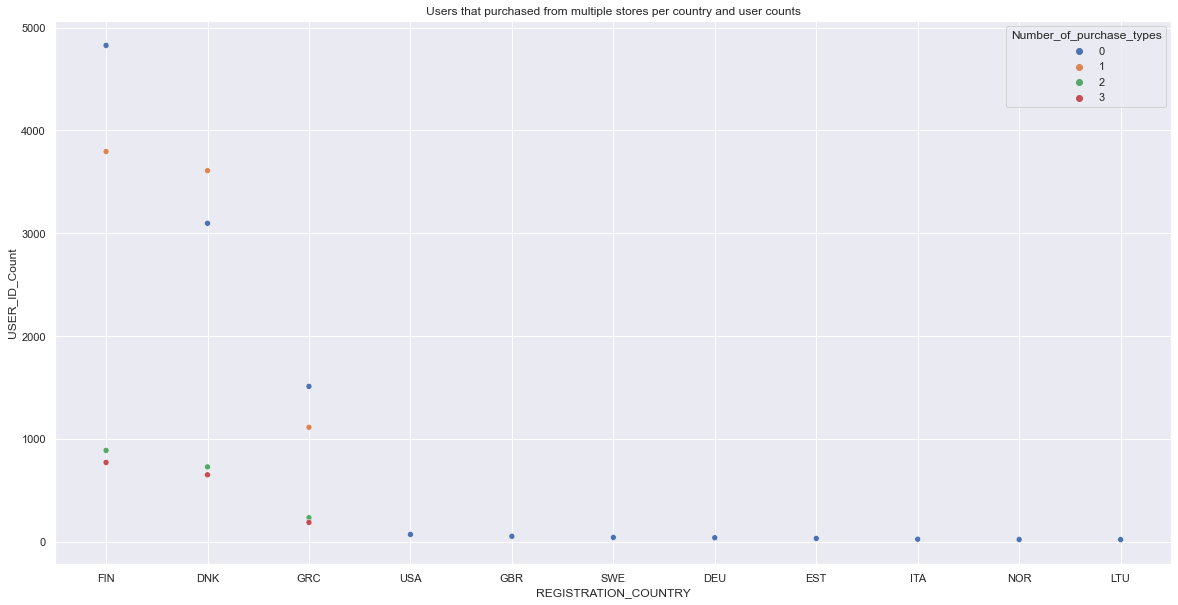

In [147]:
# Creating a bar chart that shows users who registered but never ordered anything
store_type = sns.scatterplot(x="REGISTRATION_COUNTRY", y = 'USER_ID_Count', hue ='Number_of_purchase_types',
                         data= top_20_users)

store_type.set_title('Users that purchased from multiple stores per country and user counts')

#### From the chart above we can see that most users who purchase from 1 store or more are in Finland and Denmark, perhaps most of the marketing and varieties offered only take place in Finland and Denmark. This is something that can be addressed for other countries, maybe use a similar strategy to that of Finland and Denmark. This could activate the users who reside in countries with very low rates. Although it could be that the strategies used only work for Finland and Denmark. If Wolt is going to a different market, there will be a need to understand more about that market. Another possible solution is to work with fewer countries if we are losing more money there than making money, until we have the right resources to allocate there.

#### We can start first by improving the purchase counts in Greece because we have a decent number of purchases there per store type and user counts, but the market is lacking in comparison to Finland and Denmark. We have a better chance to improve our service there given that we have already an established user base that we can expand on. 

## Why this approach can be better than non-analyst approach:

#### The ability to dig deeper within the data and create new features from existing columns will allow for more tailored insights. For example breaking down the purchases per store type into multiple columns for further segmentation

#### Replacing missing values with appropriate values such as the mean helps with better interpretation and visualisation of the results

#### Segmenting the data by just using tools such as Power BI will only allow you to see what is already made for you but by using analytical techniques we can take a deeper look at the data and this can stretch as far as the time you put into it

## Limitations and other possible analysis 

#### There other columns that can be explored, such as first and last purchase date, but these were not used for this project. It would be nice to explore the other columns to see if we could find other solutions to supplement this project

#### Clustering models could have been used such as Kmeans clustering to segment the data but given that this assignment is made for analysts I decided to not use any Machine Learning models. This will let us group users using multiple features and compare it to the segmentation we created for this project.

#### We have only one month of data which means that these findings might not apply to other months

#### I didn't test for differences statistically, for example IOS against web users.
